# Exploratory analysis, curation and data visualization



The dataset to be utilized encompasses the following columns:

**objID (Object ID)**: A unique identifier for each object.

**rac and dec (Angular Position)**: Angular coordinates denoting right ascension (**rac**) ranging from 0 to 360 and declination (**dec**) ranging from -90 to 90.

**modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z**: These variables denote the fractional representation of the total observed light from galaxies based on their frequency. For further details, refer to https://classic.sdss.org/dr4/.

**z (Redshift)**: A measure indicating the distance at which the galaxy is situated.

**petroR90_r**: An indicator of the galaxy's size.

**Color**: Represents the predominant color in the galaxy and is expressed as a numeric variable.

**elliptical, spiral, uncertain**: These columns serve to identify the morphology type of galaxies. If the value in one of these columns is 1, it signifies the galaxy has that specific morphology, with the remaining two columns holding a value of 0. Additionally, **'uncertain'** designates galaxies with irregular morphology.

### Index:
#### 1- Data Eploration and Visualization
#### 2- Data Curation
#### 3- Visualization

# Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import missingno as msno
%matplotlib inline

## Functions:

In [2]:
def boxplot(data):
    fig, ax = plt.subplots(4, 2,sharex=False, figsize=(10, 20))
    sns.boxenplot(data=data,x='modelMag_u',y='clase', ax=ax[0][0])
    sns.boxenplot(data=data,x='modelMag_g',y='clase', ax=ax[0][1])
    sns.boxenplot(data=data,x='modelMag_r',y='clase', ax=ax[1][0])
    sns.boxenplot(data=data,x='modelMag_i',y='clase', ax=ax[1][1])
    sns.boxenplot(data=data,x='modelMag_z',y='clase', ax=ax[2][0])
    sns.boxenplot(data=data,x='petroR90_r'    ,y='clase', ax=ax[2][1])
    sns.boxenplot(data=data,x='z'    ,y='clase', ax=ax[3][0])
    sns.boxenplot(data=data,x='Color',y='clase', ax=ax[3][1])
    
    
def histograma(data,column):
    graph = sns.histplot(data=data, x = column,hue='clase')
    graph.axvline(data[column][data['clase']=='I'].mean(),color='orange')
    graph.axvline(data[column][data['clase']=='S'].mean(),color='blue')
    graph.axvline(data[column][data['clase']=='E'].mean(),color='green')
    plt.show()

# 1. Data Exploration and Visualization

In [3]:
data = pd.read_csv('galaxias_1.csv', 
                   sep=',')

In [4]:
data

objID          ra        dec  modelMag_u  modelMag_g  \
0      1,23765119242489E+018  116.519097  39.886407    17.76235    16.72601   
1      1,23765149575578E+018  116.451900  41.421270    18.12179    16.26214   
2      1,23767370611537E+018  115.946713  41.918877    18.57293    17.42053   
3       1,2376737066523E+018  116.051943  42.287231    21.37438    19.77335   
4      1,23765127349266E+018  117.287392  43.434782    19.18845    17.99682   
...                      ...         ...        ...         ...         ...   
92097  1,23765494945271E+018  245.038742  50.552353    19.65135    17.74399   
92098  1,23765153764514E+018  219.313588  62.338577    18.77944    17.71890   
92099    1,237655744025E+018  239.043213   4.601942    18.93000    17.34099   
92100  1,23765546806247E+018  229.410394   0.947489    19.52601    17.68973   
92101  1,23765546806247E+018  229.410394   0.947489    19.52601    17.68973   

       modelMag_r  modelMag_i  modelMag_z  petroR90_r         z     Color  \
0        16.33972    16.06614    15.90478    8.393773  0.041521 -1.422625   
1        15.39272    14.97515    14.65105    9.674847  0.040211 -2.729061   
2        17.01788    16.75617    16.70899   11.277470  0.024386 -1.555044   
3        19.55791    20.35405    18.88184    1.539542  0.039137 -1.816479   
4        17.51119    17.26241    17.09056   12.471450  0.042591 -1.677259   
...           ...         ...         ...         ...       ...       ...   
92097    16.86763    16.43538    16.09720    3.514471  0.048618 -2.783718   
92098    17.35237    17.14414    17.04369    4.985637  0.036884 -1.427076   
92099    16.79838    16.53403    16.52089   13.324690  0.034145 -2.131620   
92100    16.90745    16.50974    16.21097    4.854905  0.039585 -2.618553   
92101    16.90745    16.50974    16.21097    4.854905  0.039542 -2.618553   

       elliptical  spiral  uncertain  
0               0       1          0  
1               0       0          1  
2               0       0          1  
3               0       0          1  
4               0       0          1  
...           ...     ...        ...  
92097           0       0          1  
92098           0       0          1  
92099           0       1          0  
92100           0       0          1  
92101           0       0          1  

[92102 rows x 14 columns]

#### I create a new column named `'clase'`, which contains the morphological type of each galaxy.

In [5]:
clase=[]
for i in range(0,data.shape[0]):
    if data.elliptical[i]==1:
        clase.append('E')
    elif data.spiral[i]==1:
        clase.append('S')
    elif data.uncertain[i]==1:
        clase.append('I')
data['clase']=clase

#### The dataset contains 92102 datapoints and 15 columns

In [6]:
data.shape 

(92102, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92102 entries, 0 to 92101
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       92102 non-null  object 
 1   ra          92102 non-null  float64
 2   dec         92102 non-null  float64
 3   modelMag_u  92102 non-null  float64
 4   modelMag_g  92102 non-null  float64
 5   modelMag_r  92102 non-null  float64
 6   modelMag_i  92102 non-null  float64
 7   modelMag_z  92102 non-null  float64
 8   petroR90_r  92102 non-null  float64
 9   z           92102 non-null  float64
 10  Color       92102 non-null  float64
 11  elliptical  92102 non-null  int64  
 12  spiral      92102 non-null  int64  
 13  uncertain   92102 non-null  int64  
 14  clase       92102 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 10.5+ MB


####  I now look for duplicated datapoints corresponding to the same galaxy.

In [8]:
duplicate_count = data.duplicated(subset=['objID']).sum()
print(duplicate_count)

34421


#### We can see there are 34421 repeated datapoints, now we should see if they are consistent between them.

In [9]:
duplicate_count = data.duplicated(subset=['objID','clase']).sum()
print(duplicate_count)

23499


#### In the cell above, we can see 10922 data points corresponding to the same galaxy but having different class tag, in other words, these points dont have the same target value. These points are going to be completely deleted, each copy, because ther are not consistent.

In [10]:
duplicates_mask = data.duplicated('objID') & ~data.duplicated(['objID', 'clase'])
data_filtered = data[~duplicates_mask]
data_filtered.shape

(81180, 15)

#### we can see in the cell above that all duplicated datapoints that have different class tag have been filtered. In the following cell I delete rest of duplicated points, but we keep only one of them, because they are consistent with eachother.

In [11]:
data = data_filtered.drop_duplicates(subset='objID',keep='first')
data.shape

(57681, 15)

#### We keep going with other explorations:

In [12]:
data.describe()

ra           dec    modelMag_u    modelMag_g    modelMag_r  \
count  57681.000000  57681.000000  57681.000000  57681.000000  57681.000000   
mean     183.419958     25.380842    183.765182    172.718436    162.646477   
std       57.659031     18.616160   1734.388143   1622.623065   1540.039554   
min        0.008745    -11.202394  -9999.000000  -9999.000000     11.902330   
25%      151.447181     10.476006     17.752040     16.314860     15.647160   
50%      183.931359     23.898519     18.447040     17.119080     16.555560   
75%      221.634978     39.408083     19.011310     17.738920     17.255280   
max      359.965567     70.133213  25756.000000  20542.000000  19138.000000   

         modelMag_i    modelMag_z    petroR90_r             z         Color  \
count  57681.000000  57681.000000  57681.000000  57681.000000  57681.000000   
mean     170.157392    136.560776     54.057630      0.035991     -3.416101   
std     1568.942667   1383.827414    882.310694      0.008498     72.031187   
min       11.459980  -9999.000000      0.842248      0.020001  -2859.000000   
25%       15.287560     15.006410      6.132339      0.028957     -2.431772   
50%       16.247150     16.020130      8.386065      0.036099     -1.898378   
75%       16.983440     16.798670     11.335120      0.043573     -1.570280   
max    23871.000000  20767.000000  78255.000000      0.050000  10015.860000   

         elliptical        spiral     uncertain  
count  57681.000000  57681.000000  57681.000000  
mean       0.074409      0.344481      0.581110  
std        0.262438      0.475203      0.493382  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

#### We can see extreme values like -9999 and 10015.8.In the color variable we can also see a minimum of -2859. These values are anormal ones, because galaxies cannot have them, by nature.

#### Displaying boxplot next

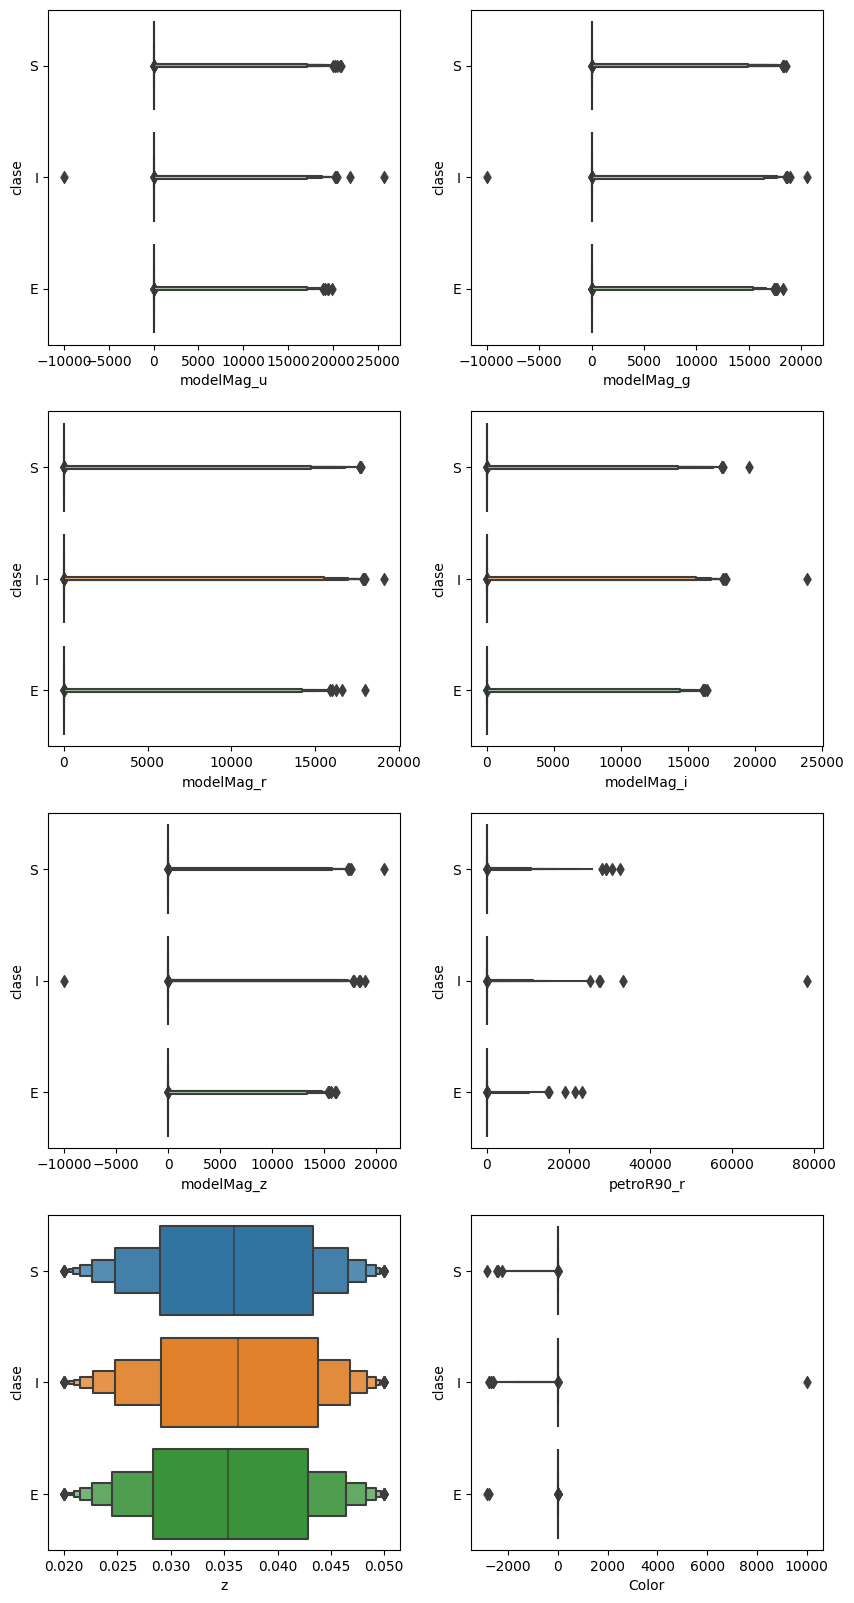

In [13]:
boxplot(data)

 #### The first thing that stands out in these boxplots is that there is a lot of data with high magnitudes, which does not make physical sense since the higher the magnitude, the weaker the object, and magnitudes of 10,000 are impossible to detect. For example, the Pan-STARRS telescope in Hawaii has a limiting magnitude of 24.
 
 # 2. Data Curation, Knn imputation.
 #### The idea is to use knn method for imputation of these anormal values.

#### To perform knn I have to first assign a Nan value to the data I want to impute. I decide to assign Nan to all visual magnitudes greater than 20 (its an informed decision based on the capabilities of the observatory from which the data came from), it doesn't matter if they are extreme values ​​like those seen in the cells above, I take them all equally and then impute them using knn. I also assign Nan the petroR90_r values ​​less than zero.

In [14]:
data.loc[(data.modelMag_u >22), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g >22.0), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r >22.2), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i >21.3), 'modelMag_i'] = np.nan 
data.loc[(data.Color >20), 'Color'] = np.nan 
data.loc[(data.modelMag_z >20.5), 'modelMag_z'] = np.nan 
data.loc[(data.petroR90_r <0), 'petroR90_r'] = np.nan 
data.loc[(data.modelMag_u <0), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g <0), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r <0), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i <0), 'modelMag_i'] = np.nan 
data.loc[(data.Color <-100), 'Color'] = np.nan 
data.loc[(data.modelMag_z <0), 'modelMag_z'] = np.nan 
data.loc[(data.Color >9), 'Color'] = np.nan

#### Looking for null values

In [15]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57681 entries, 0 to 92099
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       57681 non-null  object 
 1   ra          57681 non-null  float64
 2   dec         57681 non-null  float64
 3   modelMag_u  57013 non-null  float64
 4   modelMag_g  57131 non-null  float64
 5   modelMag_r  57162 non-null  float64
 6   modelMag_i  57100 non-null  float64
 7   modelMag_z  57200 non-null  float64
 8   petroR90_r  57681 non-null  float64
 9   z           57681 non-null  float64
 10  Color       57634 non-null  float64
 11  elliptical  57681 non-null  int64  
 12  spiral      57681 non-null  int64  
 13  uncertain   57681 non-null  int64  
 14  clase       57681 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 7.0+ MB


### The boxplot takes the following form:

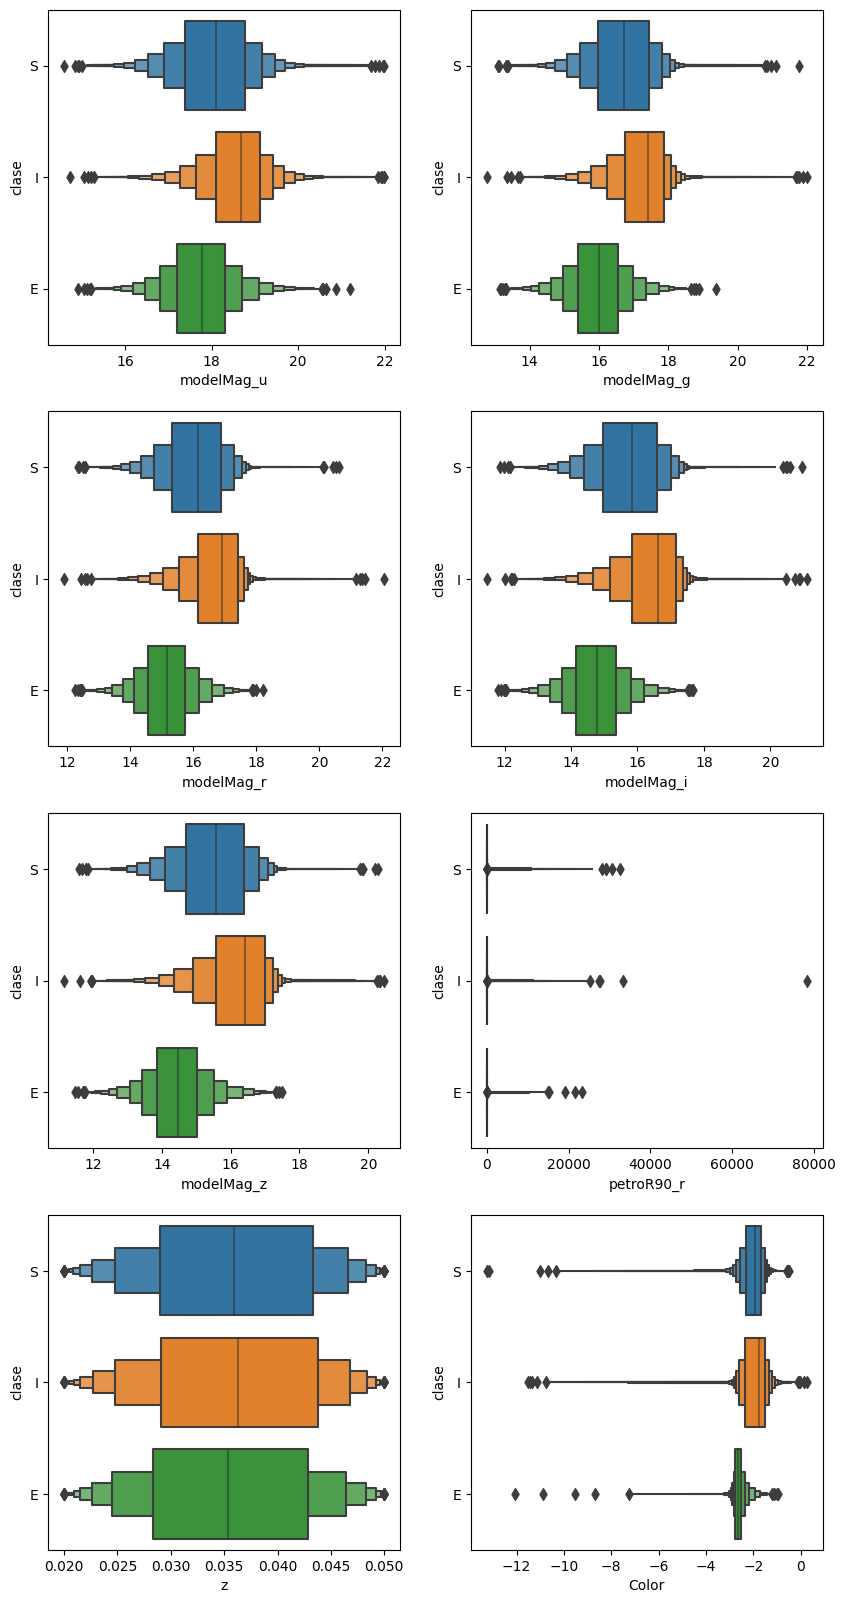

In [16]:
boxplot(data)

### To do knn I have to scale the data, but to scale it I need to eliminate outliers, (I could not do it, if I choose to use a robust scaler, but since at some point we have to do outier elimination I prefer to do it now)

In [17]:
data.isna().sum().sum()  #count the Nans to make sure that the elimination of outliers
                        #do not also eliminate the Nan since we are going to impute them

2846

Eliminacion de outliers para hacer knn

In [18]:
cols = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z',
       'Color']
Q1 = data.quantile(0.25,numeric_only=True)
Q3 = data.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()

C:\Users\joaqu\AppData\Local\Temp\ipykernel_7264\398611876.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
C:\Users\joaqu\AppData\Local\Temp\ipykernel_7264\398611876.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()


In [19]:
data=data_clean.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56545 entries, 0 to 92099
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       56545 non-null  object 
 1   ra          56545 non-null  float64
 2   dec         56545 non-null  float64
 3   modelMag_u  56012 non-null  float64
 4   modelMag_g  56021 non-null  float64
 5   modelMag_r  56039 non-null  float64
 6   modelMag_i  55987 non-null  float64
 7   modelMag_z  56095 non-null  float64
 8   petroR90_r  56545 non-null  float64
 9   z           56545 non-null  float64
 10  Color       56500 non-null  float64
 11  elliptical  56545 non-null  int64  
 12  spiral      56545 non-null  int64  
 13  uncertain   56545 non-null  int64  
 14  clase       56545 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 6.9+ MB


#### I check that the Nans were not removed from the dataframe.

In [21]:
data.isna().sum().sum() #Some of them were deleted for being outliers of some other column.

2616

#### Finally, the dataframe is distributed as follows, and without outliers. 

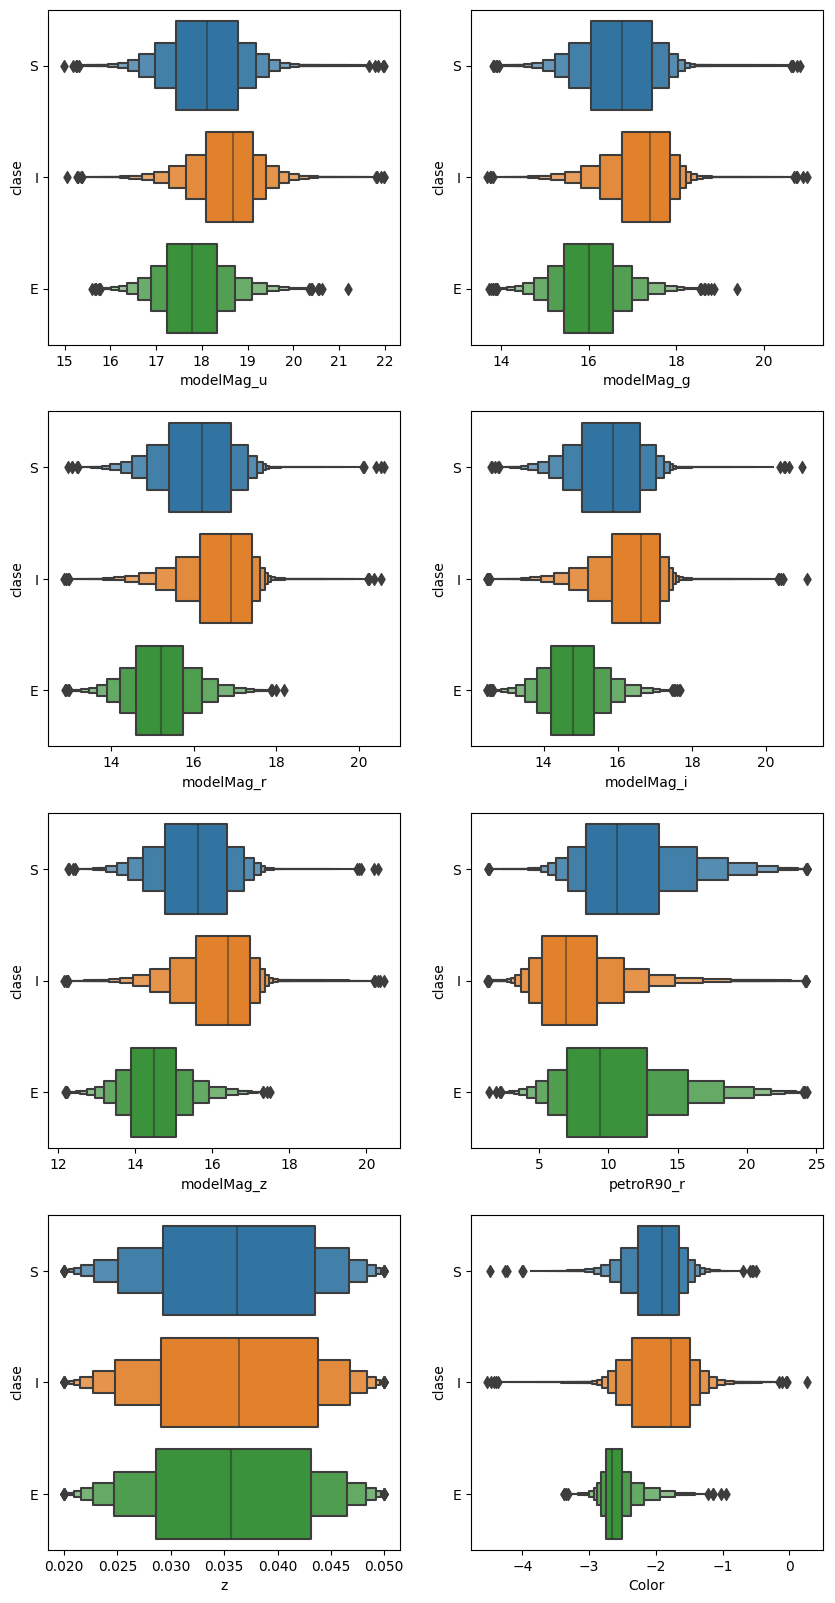

In [22]:
boxplot(data)

### Now I want to analyze how the missing values ​​are distributed.

In [23]:
relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']

https://stackoverflow.com/questions/75525029/msno-matrix-shows-an-error-when-i-use-any-venv-using-pyenv
I leave this here in case a common error occurs

<Axes: >

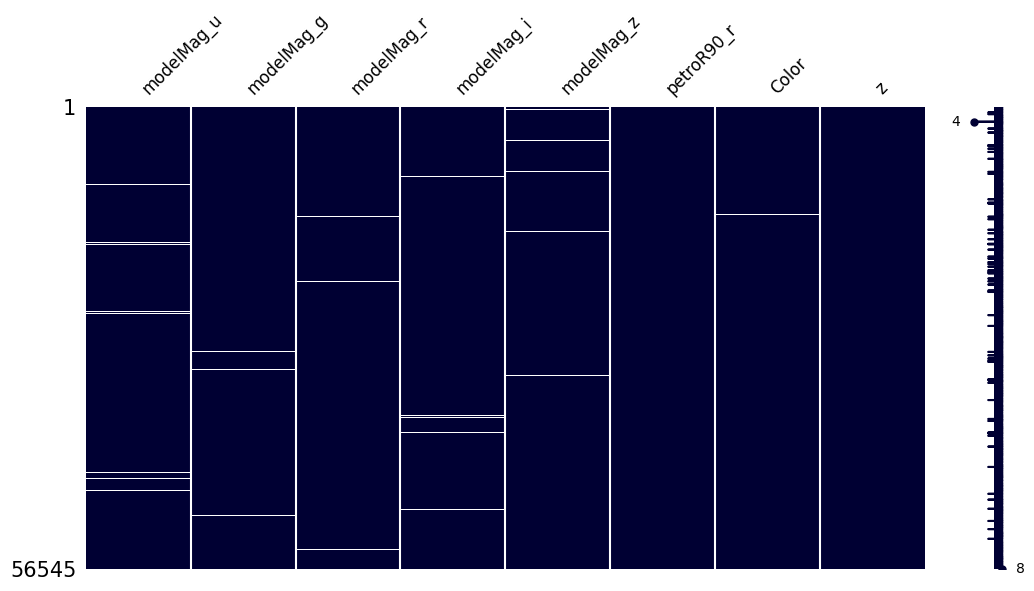

In [24]:
data_msno = data_clean[relevant_columns] #las linas blancas represetan los datos faltantes.
msno.matrix(
    data_msno, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  

we can see that `'z','color' y 'petroR90_r'` have not missing values

#### We can now scale the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

In [26]:
#relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
columns_to_use = relevant_columns

scaler = MinMaxScaler()
data_clean[columns_to_use] = scaler.fit_transform(data_clean[columns_to_use])

#### cheking for succesfull scaling.

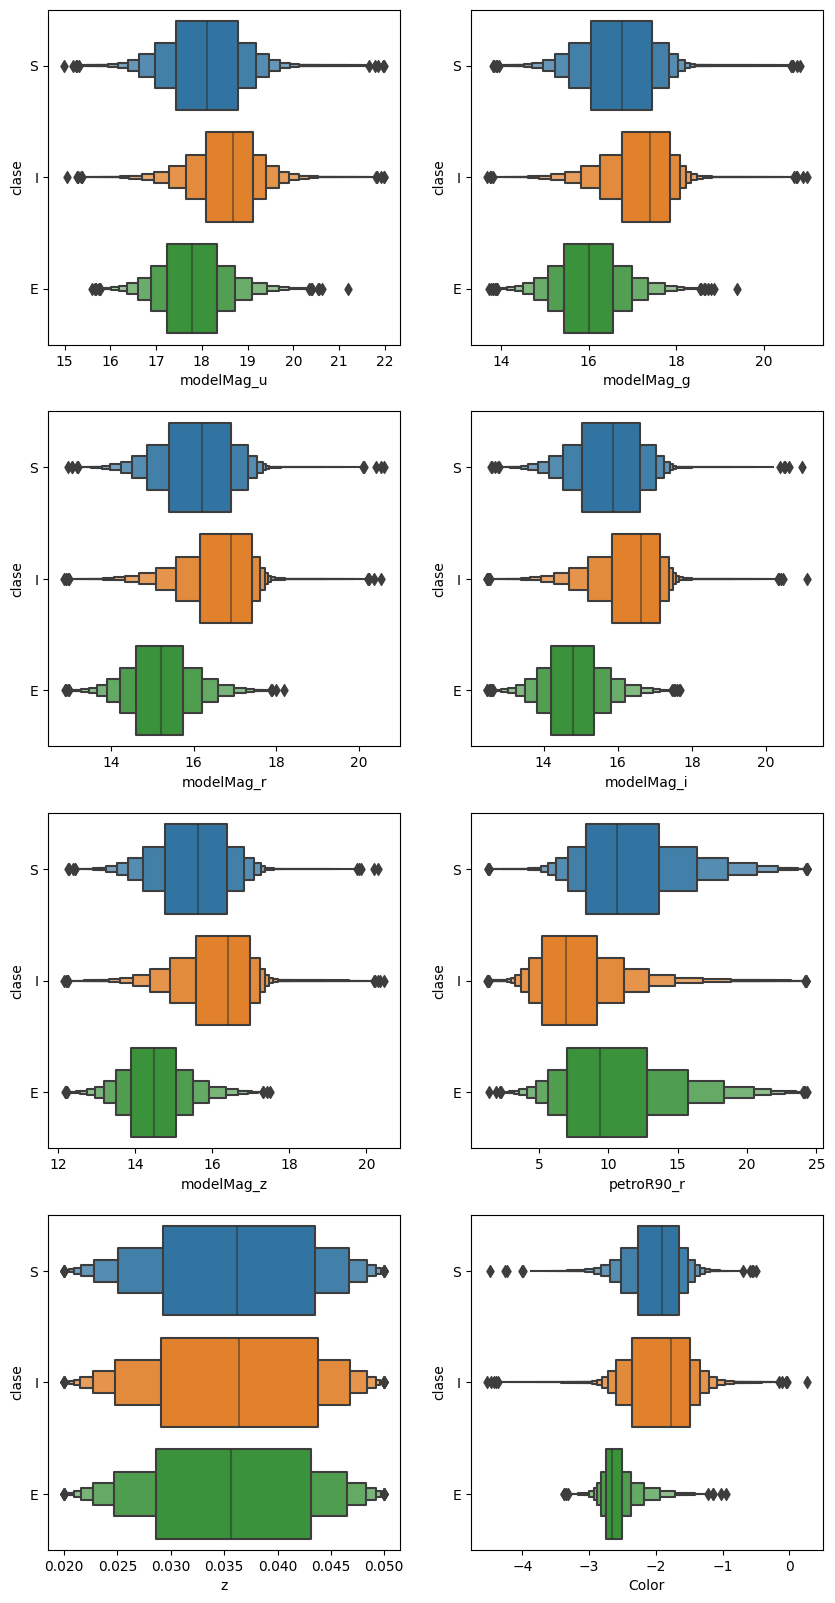

In [27]:
boxplot(data)

### Missing features are then imputed, using all variables to adjust.

In [28]:
data_clean_imputada =data_clean.copy(deep=True)

In [29]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
data_clean_imputada[columns_to_use] = imputer.fit_transform(
    data_clean_imputada[columns_to_use]
)

C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

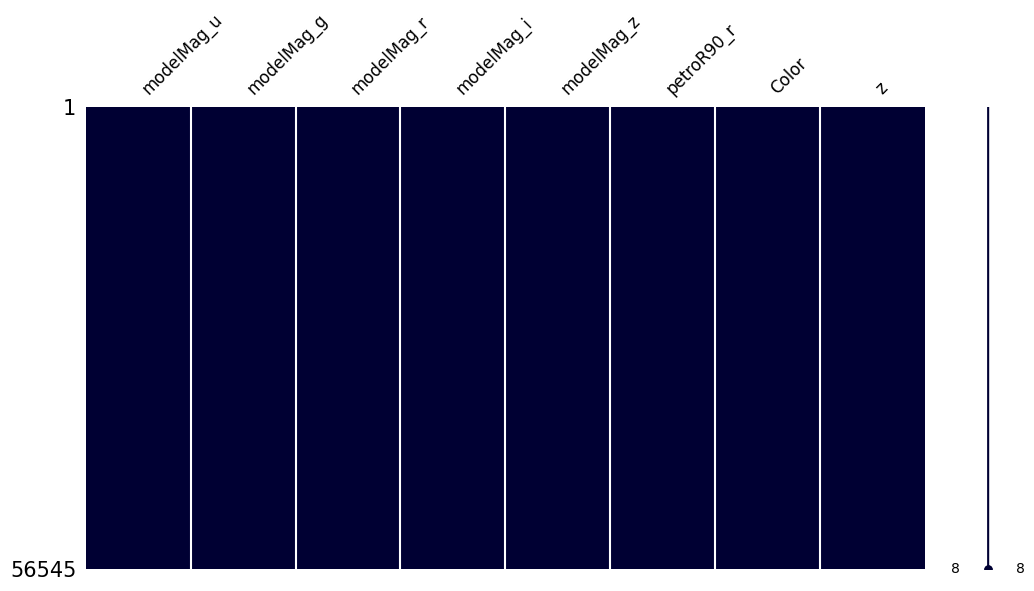

In [30]:
data_msno = data_clean_imputada[relevant_columns]
msno.matrix(
    data_msno, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  # out of context checking for lost values

### To check that the imputation is effective, the density curves of the imputed variables are compared with the density curves of the original variables without imputing. We can see it was a success.

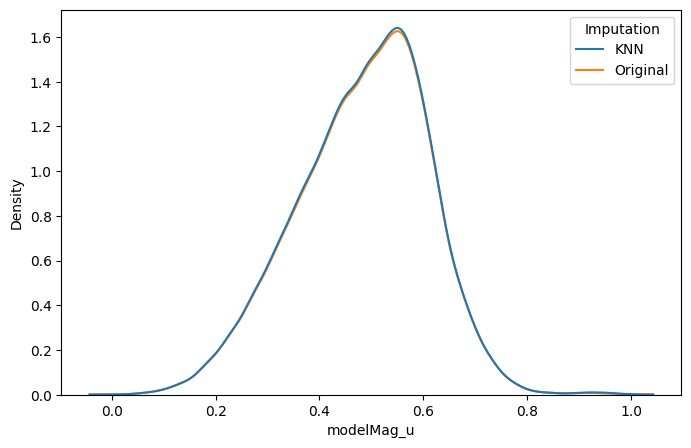

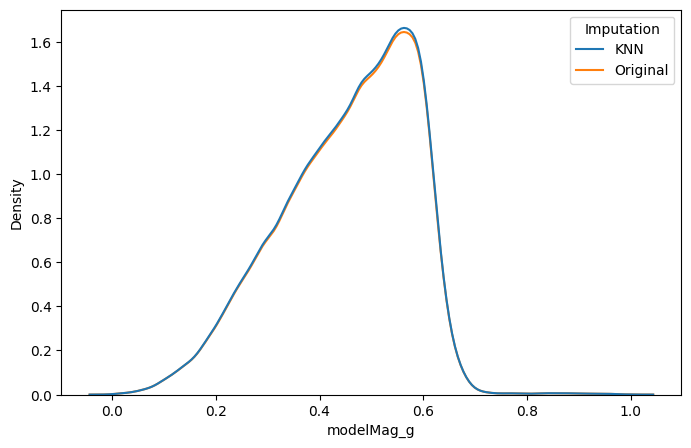

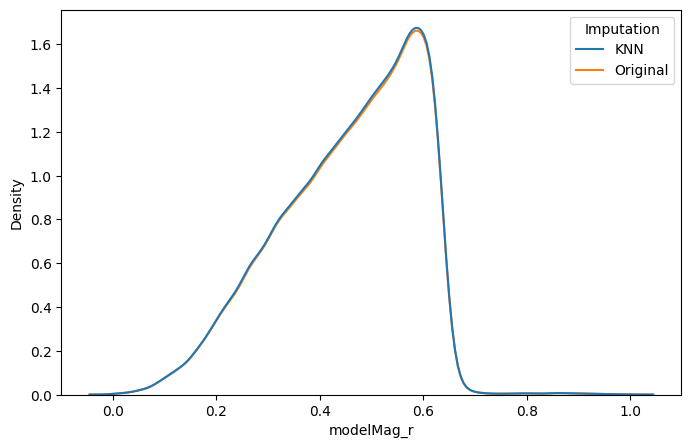

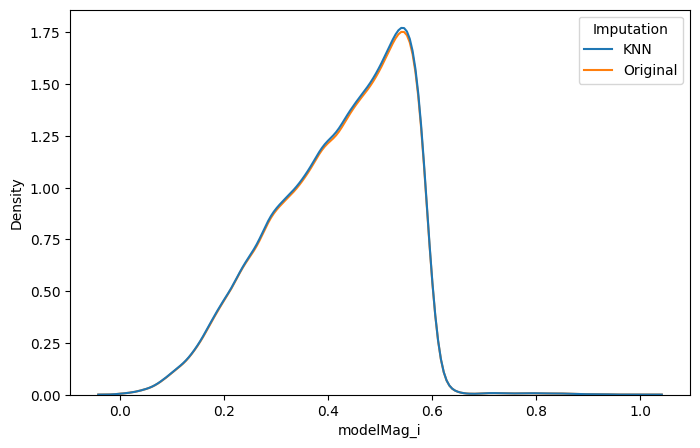

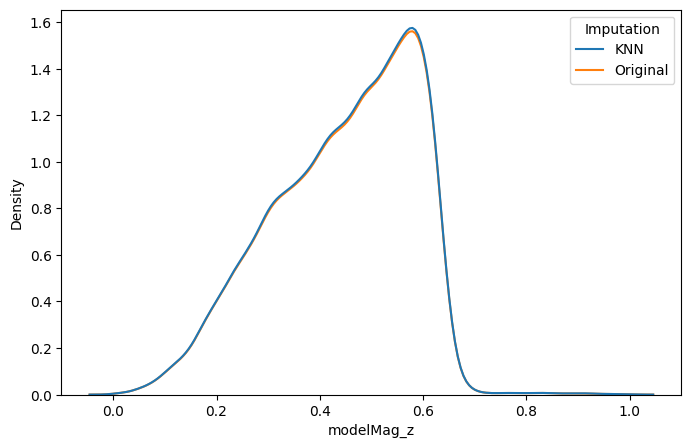

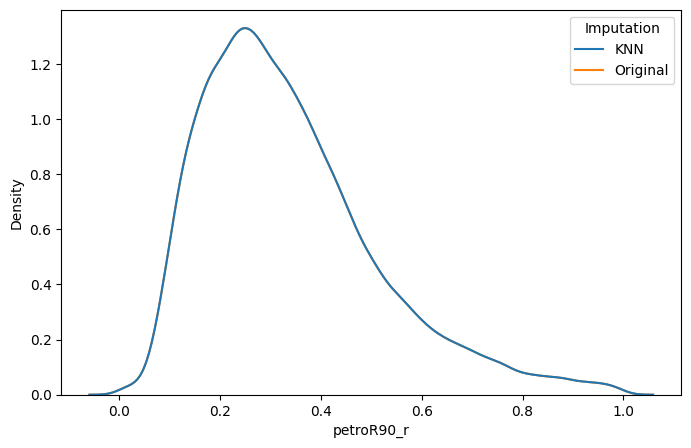

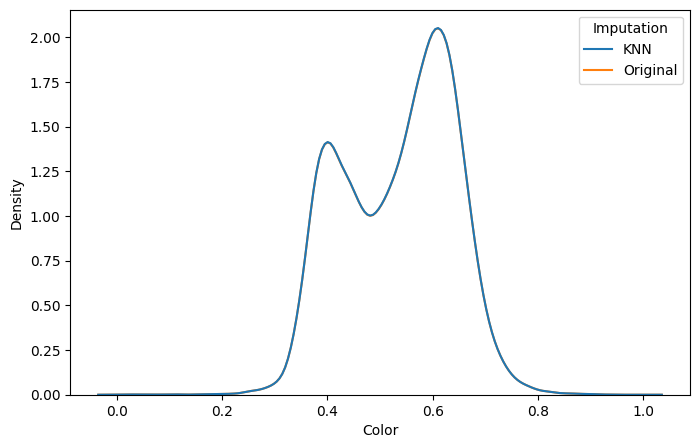

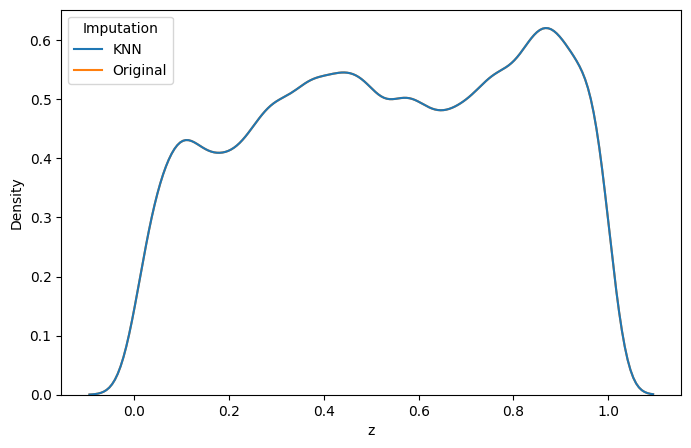

In [31]:

for column in columns_to_use: 
    imputado = data_clean_imputada[column].copy().to_frame()
    imputado['Imputation'] = 'KNN'
    original = data_clean[column].dropna().copy().to_frame()
    original['Imputation'] = 'Original'
    data1 = pd.concat([imputado, original])
    data1=data1.reset_index()
    fig = plt.figure(figsize=(8, 5))
    g = sns.kdeplot(data=data1, x=column, hue='Imputation')
    #%matplotlib inline
    #plt.savefig('densidades.png')

#### Final checkings... and we can see that the resulting dataframe contains 56545 non-null values in each feature, just as expeted.

In [32]:
data_clean_imputada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56545 entries, 0 to 92099
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       56545 non-null  object 
 1   ra          56545 non-null  float64
 2   dec         56545 non-null  float64
 3   modelMag_u  56545 non-null  float64
 4   modelMag_g  56545 non-null  float64
 5   modelMag_r  56545 non-null  float64
 6   modelMag_i  56545 non-null  float64
 7   modelMag_z  56545 non-null  float64
 8   petroR90_r  56545 non-null  float64
 9   z           56545 non-null  float64
 10  Color       56545 non-null  float64
 11  elliptical  56545 non-null  int64  
 12  spiral      56545 non-null  int64  
 13  uncertain   56545 non-null  int64  
 14  clase       56545 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 6.9+ MB


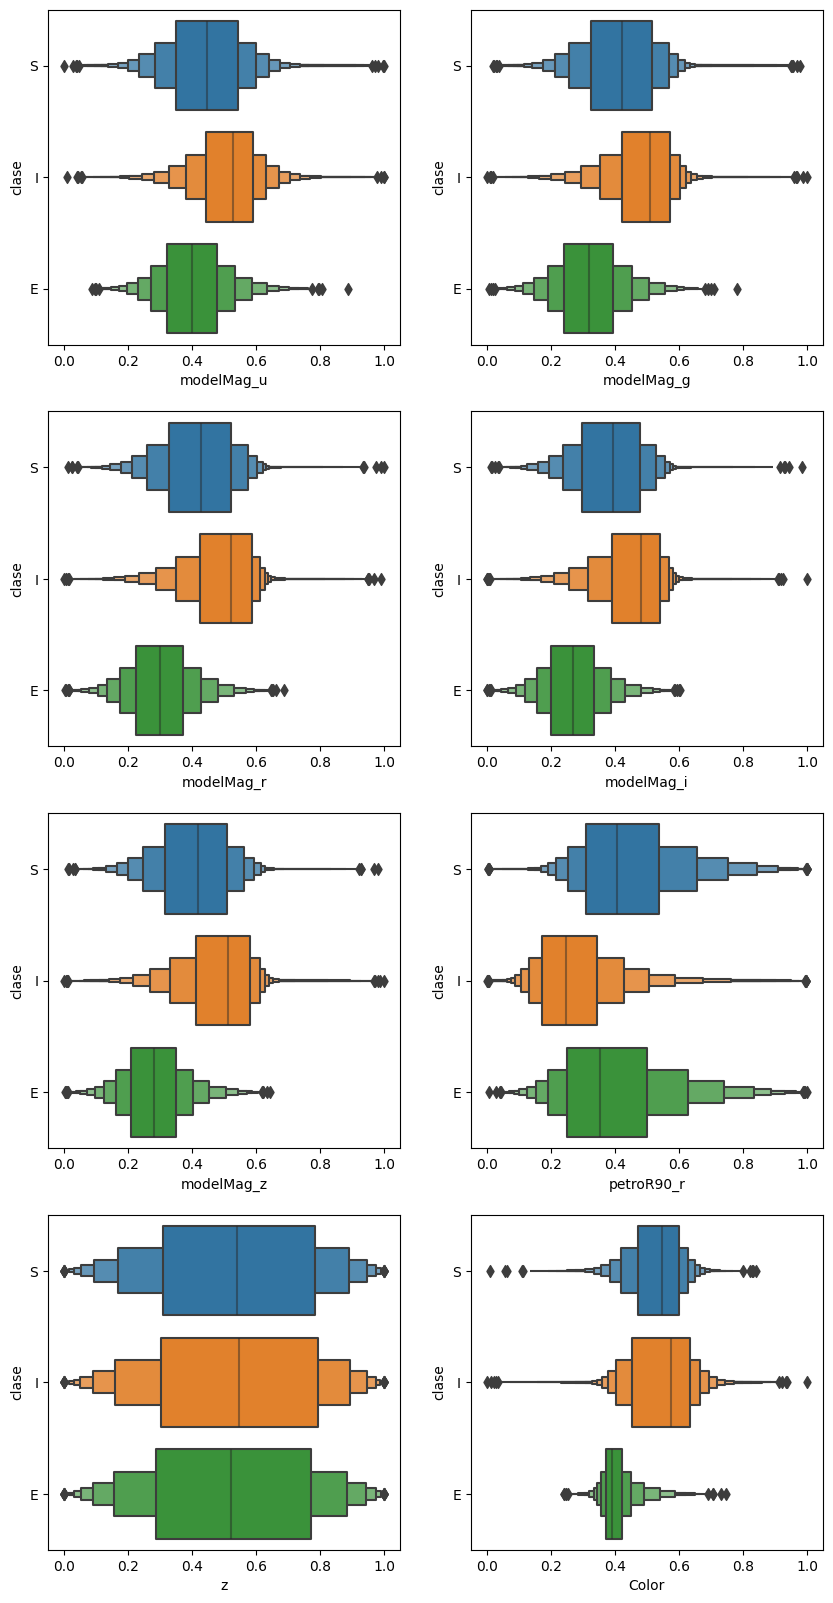

In [33]:
boxplot(data_clean_imputada)

#### So now we can download the resulting dataset, this one is going to be used later in the notebooks.

In [34]:
data_clean_imputada.to_csv('curated_galaxies')

# 3. Visualization


In [35]:
attributes = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z',
       'Color','clase']

### Marginal probability of each class 

In [38]:
# Calculating the marginal probability of each morphological type
morfologia_counts = data_clean_imputada['clase'].value_counts()
marginal_probability = morfologia_counts / len(data_clean_imputada)
print(marginal_probability)

I    0.587055
S    0.339782
E    0.073163
Name: clase, dtype: float64


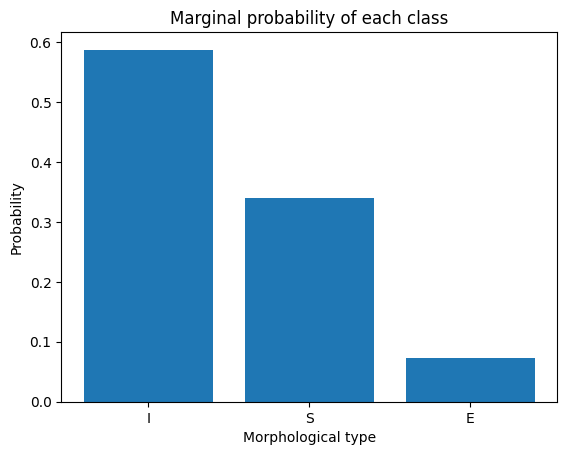

In [39]:
# Graphing the marginal probability
plt.bar(marginal_probability.index, marginal_probability.values)
plt.title('Marginal probability of each class')
plt.xlabel('Morphological type')
plt.ylabel('Probability')
#plt.savefig('marginal_probability')
plt.show()

### Pairplot

##### To generate a pairplot I need to create a dataframe that contains only the columns to be crossed, otherwise the image will take forever.

In [42]:
data_pairplot=data_clean_imputada[attributes].copy()

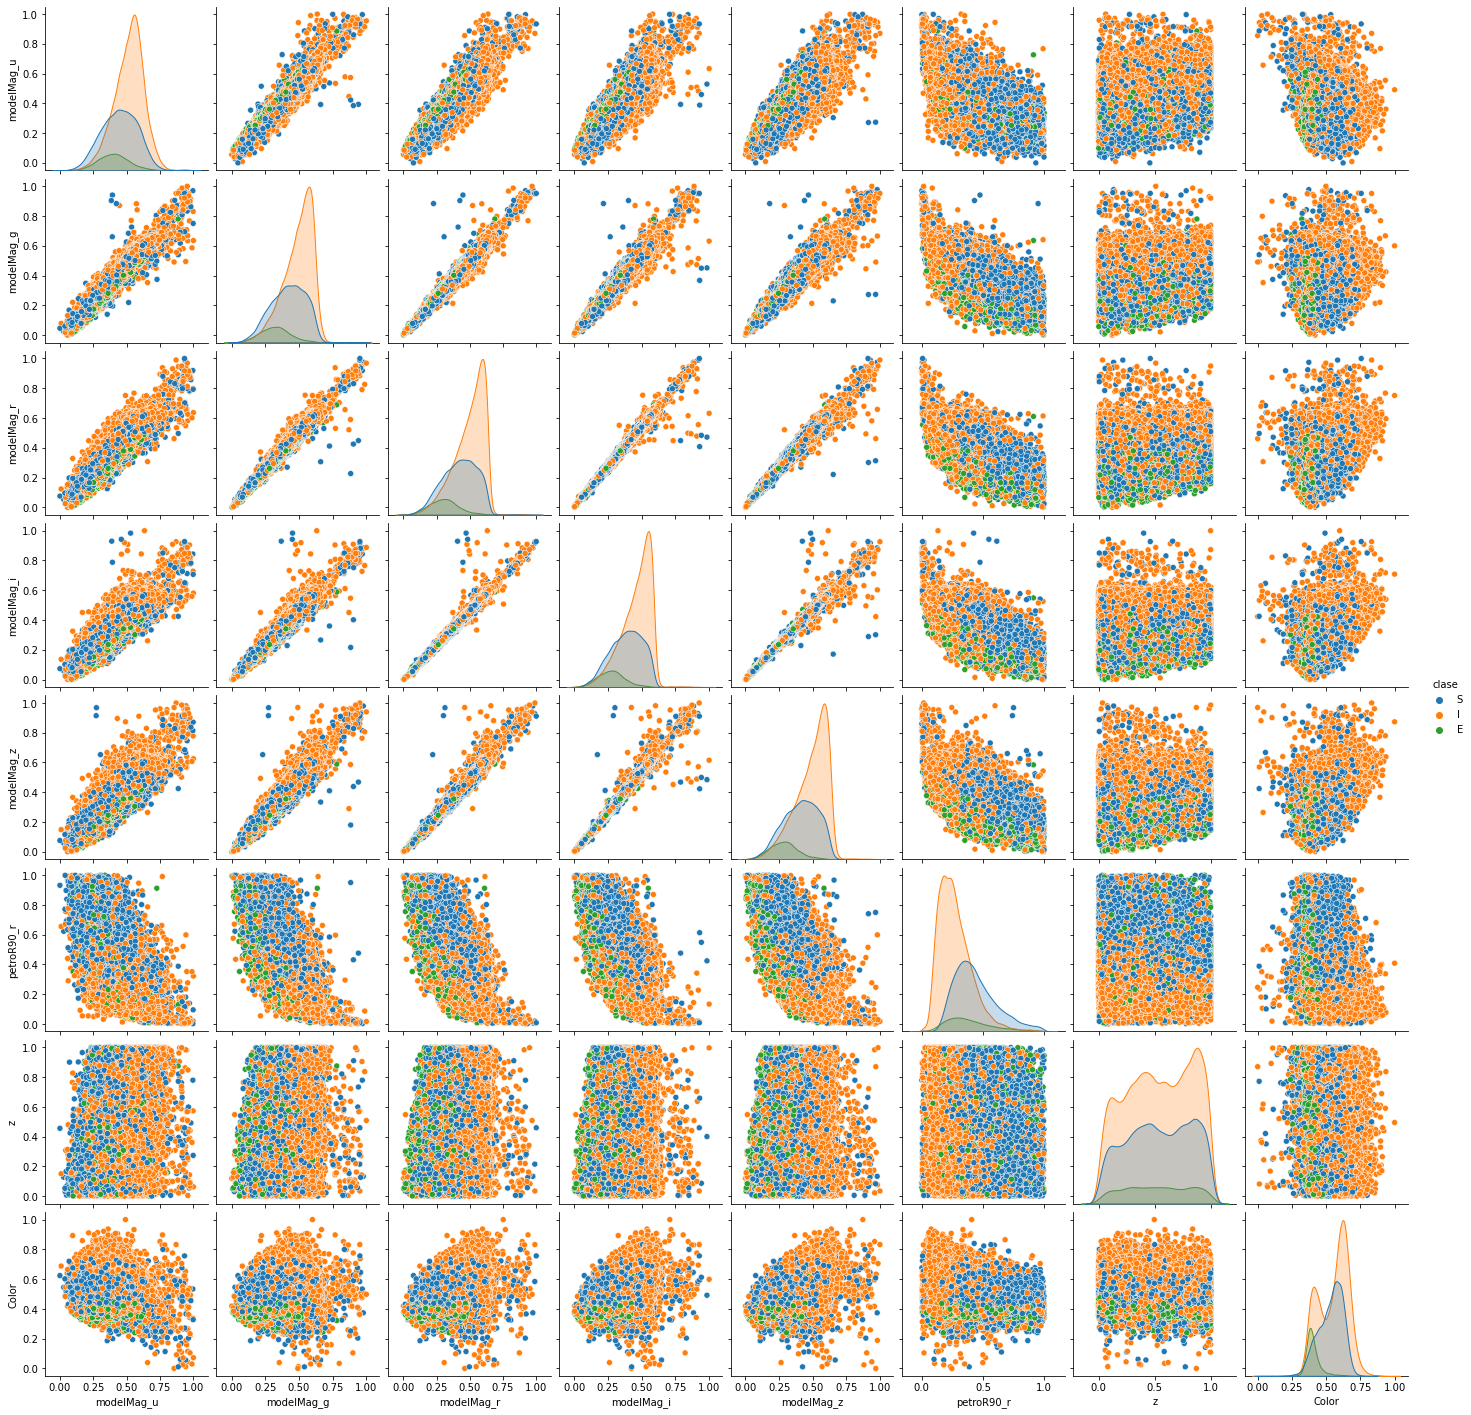

In [159]:
sns.pairplot(data_pairplot, hue="clase") #pairplot
plt.savefig('pairplot.png')  

## Histograms

#### modelMag_u

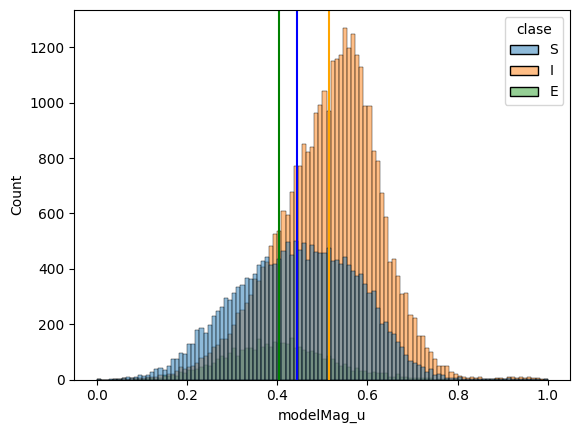

In [43]:
histograma(data_pairplot,attributes[0])

#### modelMag_g

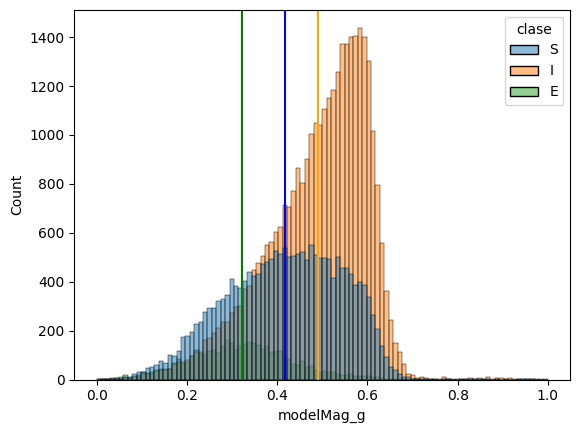

In [44]:
histograma(data_pairplot,attributes[1])

#### modelMag_r

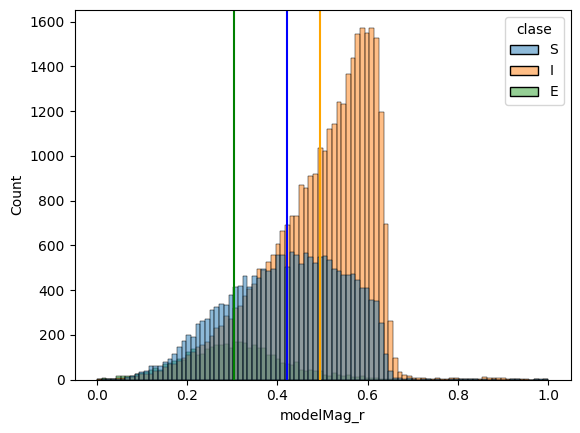

In [45]:
histograma(data_pairplot,attributes[2])

#### modelMag_i

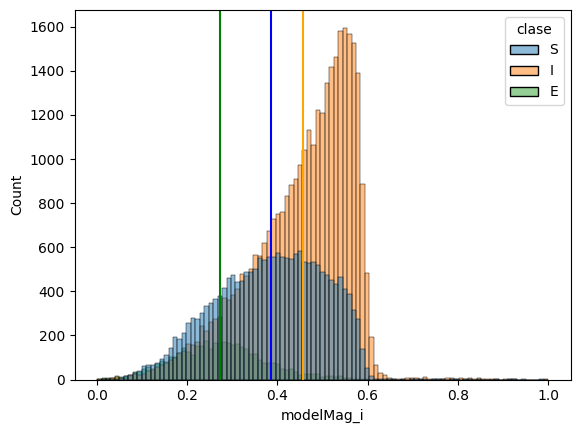

In [46]:
histograma(data_pairplot,attributes[3])

#### modelMag_z

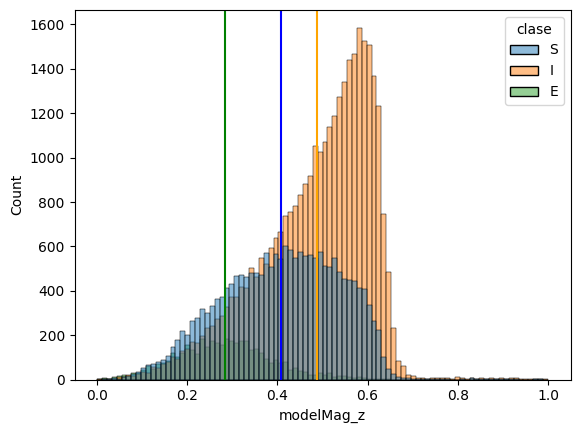

In [47]:
histograma(data_pairplot,attributes[4])

#### petroR90_r

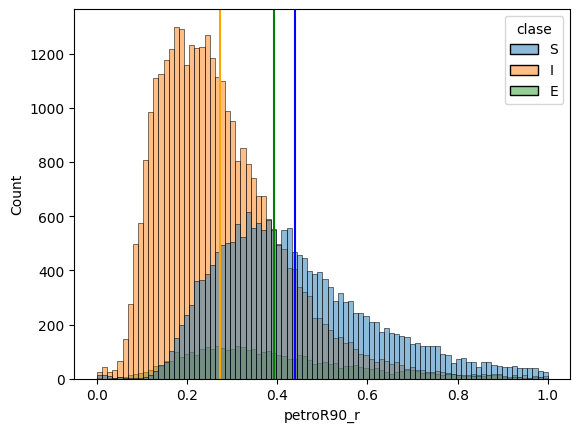

In [48]:
histograma(data_pairplot,attributes[5])

#### z

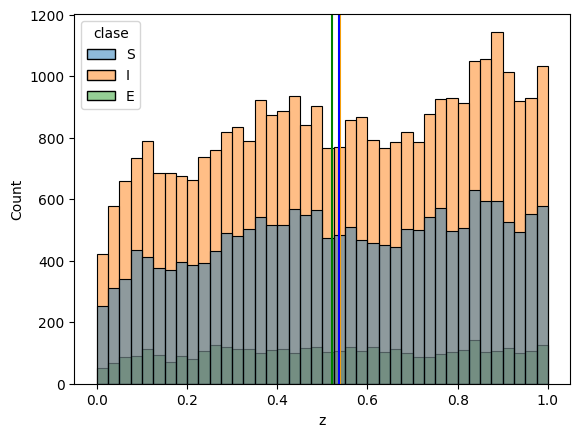

In [49]:
histograma(data_pairplot,attributes[6])

#### Color

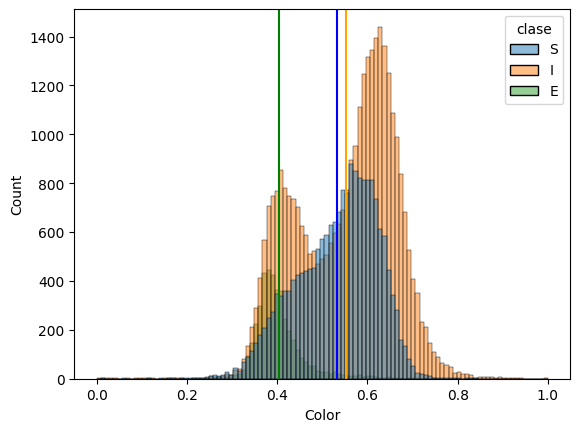

In [50]:
histograma(data_pairplot,attributes[7])


##### So what do I have to say about the histograms above?
##### First of all, we can see that irregular galaxies are brighter than the other morphologies, in all measured magnitudes. This is probably explained by the fact that irregular galaxies tend to have more star formation inside them. Spirals always come second and ellipticals follow.
##### Second, petroR90_r is a measure of galaxy size, and the mean values ​​of each class are also representative of what is happening in the universe.
##### Third, z is a magnitude of the distance of each galaxy and, as expected, the mean values ​​of each class are more or less the same. We might avoid using this variable in the future but for now we will keep it, unless we use some hypothesis test like Anova to drop the variable.
##### Fourth, the color of the Irregular class has to be maximum, which suggests that the Irregular class may contain two subclasses that better explain the data.

## Image visualization.
#### using the obersvatory's API we can download Images of each galaxy, in 5 different filters corresponding to different wavelength

The angular positions (ra, dec) of each galaxy are taken and their corresponding images are downloaded in the filters **g**, **r**,**u**,**i** and **z**.

All filters for SDSS
**'Optical:SDSS**: ['SDSSg',
                  'SDSSi',
                  'SDSSr',
                  'SDSSu',
                  'SDSSz']

In [51]:
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import units
from astroquery.skyview import SkyView
import numpy as np
from astropy import units as u

In [54]:
# Single Image example
coords_gx = SkyCoord(data_clean_imputada.ra.iloc[7], data_clean_imputada.dec.iloc[7], unit=(u.deg, u.deg)) 
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])

In [55]:
# single galaxy visualization
img[0][0].data

array([[ 0.00805664, -0.01133728, -0.01133728, ..., -0.01533508,
        -0.01922607,  0.00017309],
       [-0.019104  ,  0.00417328,  0.00805664, ..., -0.034729  ,
        -0.034729  , -0.034729  ],
       [ 0.03131104,  0.00805664,  0.00805664, ...,  0.0234375 ,
        -0.03863525, -0.03863525],
       ...,
       [ 0.00828552, -0.00337601, -0.00337982, ...,  0.00941467,
         0.00563812, -0.01702881],
       [ 0.02383423,  0.01992798,  0.01992798, ..., -0.00947571,
        -0.00569153, -0.00569153],
       [-0.00337601,  0.02383423, -0.00337601, ..., -0.02456665,
        -0.00569153,  0.02828979]], dtype=float32)

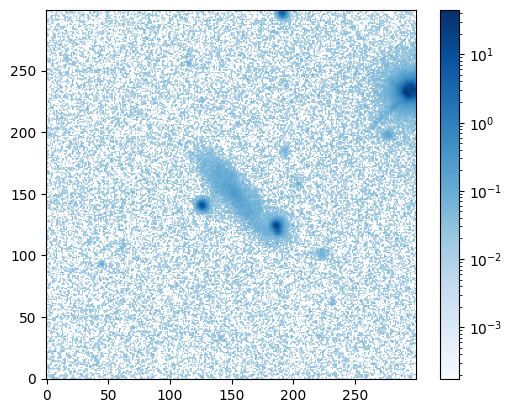

In [56]:
plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()

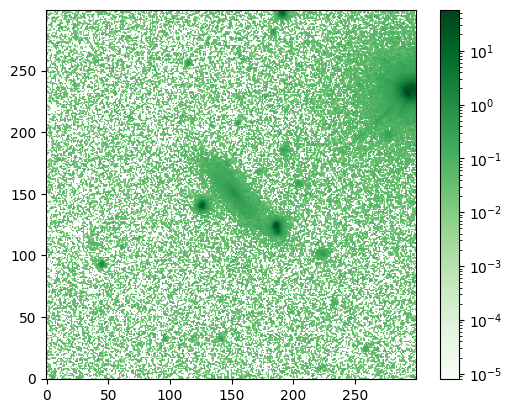

In [57]:
plt.imshow(img[1][0].data, cmap='Greens', norm=LogNorm(), origin='lower')
plt.colorbar()

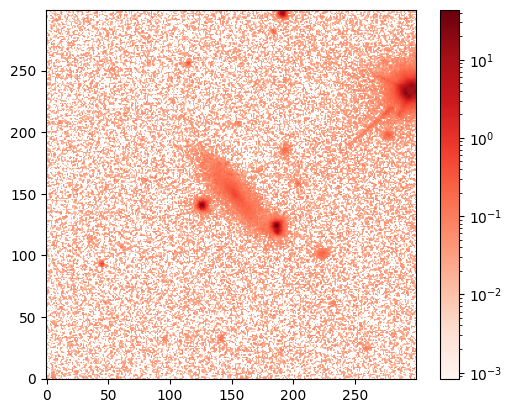

In [58]:
plt.imshow(img[2][0].data, cmap='Reds', norm=LogNorm(), origin='lower')
plt.colorbar()

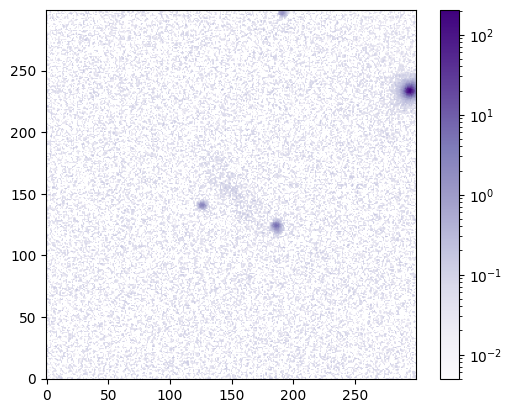

In [59]:
plt.imshow(img[3][0].data, cmap='Purples', norm=LogNorm(), origin='lower')
plt.colorbar()

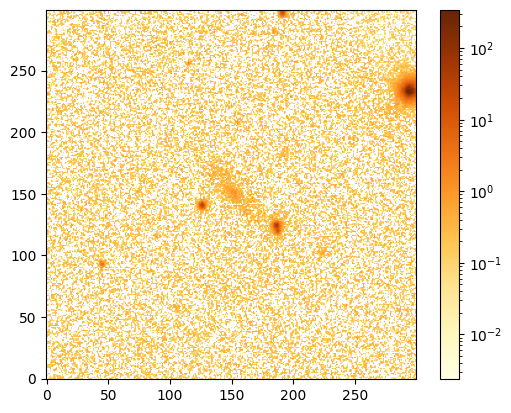

In [60]:
plt.imshow(img[4][0].data, cmap='YlOrBr', norm=LogNorm(), origin='lower')
plt.colorbar()

The images have size (300,300)

In [61]:
img[0][0].data.shape

(300, 300)

DataFrame Creation

In [62]:
def image_transformation(ra, dec):
    coords_gx = SkyCoord(ra, dec, unit=(u.deg, u.deg))
    img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
    SDSSg = img[0][0].data.flatten()
    SDSSi = img[0][0].data.flatten()
    SDSSr = img[0][0].data.flatten()
    SDSSu = img[0][0].data.flatten()
    SDSSz = img[0][0].data.flatten()

    result = np.concatenate([SDSSg,SDSSi,SDSSr,SDSSu,SDSSz])

    return result

In [63]:
stack = image_transformation(data_clean_imputada.ra[7], data_clean_imputada.dec[7])
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [65]:
from math import sqrt
from joblib import Parallel, delayed

In [66]:
data_clean_imputada=data_clean_imputada.reset_index()


In [72]:
#indexs=[1,2,3,4,5,6,7,8,9]
limit=len(data_clean_imputada)-1

for index in range(1,25):
   # print(index)
    try:
        img = image_transformation(data_clean_imputada.ra.iloc[index], data_clean_imputada.dec.iloc[index])
        stack=np.vstack([stack,img])
        df =pd.DataFrame(stack)
    except:   
        pass

In [74]:
df.head(5)

0         1         2         3         4         5         6       \
0   0.008057 -0.011337 -0.011337 -0.015228  0.023560  0.027466  0.035217   
1  -0.011612  0.017517 -0.007965 -0.004326  0.024811  0.006607  0.002964   
2  -0.010437 -0.010437  0.008438  0.008438  0.000881  0.008423 -0.025543   
3   0.014923  0.007248 -0.004265  0.034119 -0.004265  0.011078  0.026428   
4   0.005363 -0.009720  0.009140  0.009140 -0.005951  0.012909  0.001591   
5   0.038452  0.020721  0.020721  0.027802  0.077515  0.031372  0.066895   
6  -0.008438  0.009247  0.019867  0.037537  0.002144 -0.004951 -0.012039   
7   0.008057 -0.011337 -0.011337 -0.015228  0.023560  0.027466  0.035217   
8   0.012329 -0.015228  0.028076  0.000517 -0.015228 -0.042786  0.051697   
9   0.019501  0.008118 -0.022217  0.019501  0.015717  0.015717 -0.026001   
10 -0.024628 -0.012802 -0.020691 -0.008865  0.002949  0.002949 -0.028564   
11 -0.025665 -0.025665  0.002052  0.013931 -0.001905 -0.001905 -0.001905   
12 -0.002468 -0.023254  0.011383  0.011383 -0.005928  0.018311  0.004456   
13 -0.020996 -0.002533 -0.024048 -0.014832  0.043579  0.028229  0.009766   
14 -0.002285 -0.002285 -0.009201  0.004623  0.004631  0.008087  0.008087   
15  0.014435  0.024017 -0.023956 -0.007965  0.014435  0.001637 -0.007965   
16  0.008835 -0.030212 -0.010681  0.001026 -0.010681 -0.018494  0.001026   
17 -0.012634  0.002460  0.002460 -0.001316 -0.001316 -0.012650 -0.027740   
18 -0.030396 -0.016022 -0.005226 -0.005226 -0.019623  0.001965  0.027130   
19 -0.012131  0.005920  0.009537  0.002312 -0.015747 -0.012131 -0.004913   
20 -0.012543 -0.009521  0.041931  0.008636  0.017700  0.005608 -0.015564   
21 -0.014969 -0.007454  0.000070 -0.014969  0.018860 -0.022491  0.022644   
22 -0.013580  0.008331  0.004677  0.008331  0.008331 -0.002628 -0.020874   
23  0.012863  0.012863  0.005432  0.027710  0.009140  0.031433  0.031433   

      7         8         9       ...    449990    449991    449992    449993  \
0   0.015808  0.015808  0.019684  ... -0.024597  0.001856  0.039612 -0.039673   
1   0.002964 -0.018890 -0.022522  ...  0.017792  0.014145 -0.004021 -0.000387   
2   0.004654 -0.006676  0.012207  ...  0.000863 -0.010468  0.000863 -0.036865   
3   0.030243  0.076294 -0.000431  ...  0.176270  0.180176  0.187744  0.156982   
4  -0.028564 -0.002182  0.009125  ... -0.020905 -0.051086  0.009293  0.031921   
5   0.066895  0.049133  0.059753  ... -0.028198  0.008270  0.024475  0.008270   
6  -0.008514  0.058716 -0.026215  ...  0.001432 -0.005646  0.008514  0.001431   
7   0.015808  0.015808  0.019684  ... -0.024597  0.001856  0.039612 -0.039673   
8   0.051697  0.004448 -0.030975  ... -0.017487  0.004890  0.027252 -0.013763   
9  -0.003258  0.008118  0.038452  ... -0.026123  0.000440 -0.003353  0.004234   
10 -0.008865 -0.040405  0.018707  ... -0.023468 -0.005699  0.019165  0.008499   
11  0.002052  0.009964  0.029755  ... -0.010864  0.030609 -0.017792 -0.017792   
12 -0.040527 -0.040527 -0.033630  ...  0.019318 -0.000408 -0.000408  0.003536   
13 -0.024048 -0.014832 -0.011749  ...  0.026123  0.007713  0.015076  0.015076   
14  0.001175  0.014999  0.008087  ...  0.031158  0.004417 -0.018494 -0.018494   
15 -0.017548 -0.001564  0.004837  ... -0.001665 -0.004868 -0.043274 -0.024078   
16  0.012741  0.008835  0.028351  ...  0.006271  0.006271 -0.020172  0.010056   
17 -0.012650  0.040222  0.006233  ...  0.013779 -0.001335  0.025116 -0.012680   
18 -0.005226 -0.005226  0.034363  ... -0.012192  0.016632  0.009430  0.009430   
19 -0.004913  0.005920 -0.008530  ...  0.026550  0.001497 -0.016388  0.012222   
20 -0.021606 -0.009506 -0.009506  ...  0.040466  0.003601  0.007286  0.014664   
21  0.026398 -0.014969  0.011353  ... -0.007561 -0.003803  0.022491  0.003708   
22  0.004677 -0.031799  0.001024  ... -0.009842  0.012024  0.033875  0.001099   
23  0.027710  0.016571 -0.001991  ... -0.003193  0.025696  0.025696  0.025696   

      449994    449995    449996    449997    449998    449999  
0   0.001860  